# librerias necesarias

In [2]:
#pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

# Importo los datos

In [3]:
train = pd.read_excel('bike_train.xlsx')

In [4]:
test = pd.read_excel('bike_test.xlsx')

In [37]:
'''Visualizo datos '''
train.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [5]:
train.shape

(11999, 17)

In [38]:
'''Visualizo datos '''
test.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045


In [24]:
test.shape

(5380, 14)

# Análisis exploratorio de los datos


In [ ]:
'''Ver valores nulos'''
train.isna().sum().sort_values()

In [ ]:
'''Ver valores nulos'''
test.isna().sum().sort_values()

In [ ]:
'''Tipo de datos'''
train.info()

In [ ]:
'''Tipo de datos'''
test.info()

In [28]:
train.duplicated().sum()

0

In [67]:
test.duplicated().sum()

0

In [25]:
train.select_dtypes(include=['float64', 'int']).describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


Correlación de variables

In [26]:
'''Correlaciòn para tomar las variables'''
corr = train.corr()

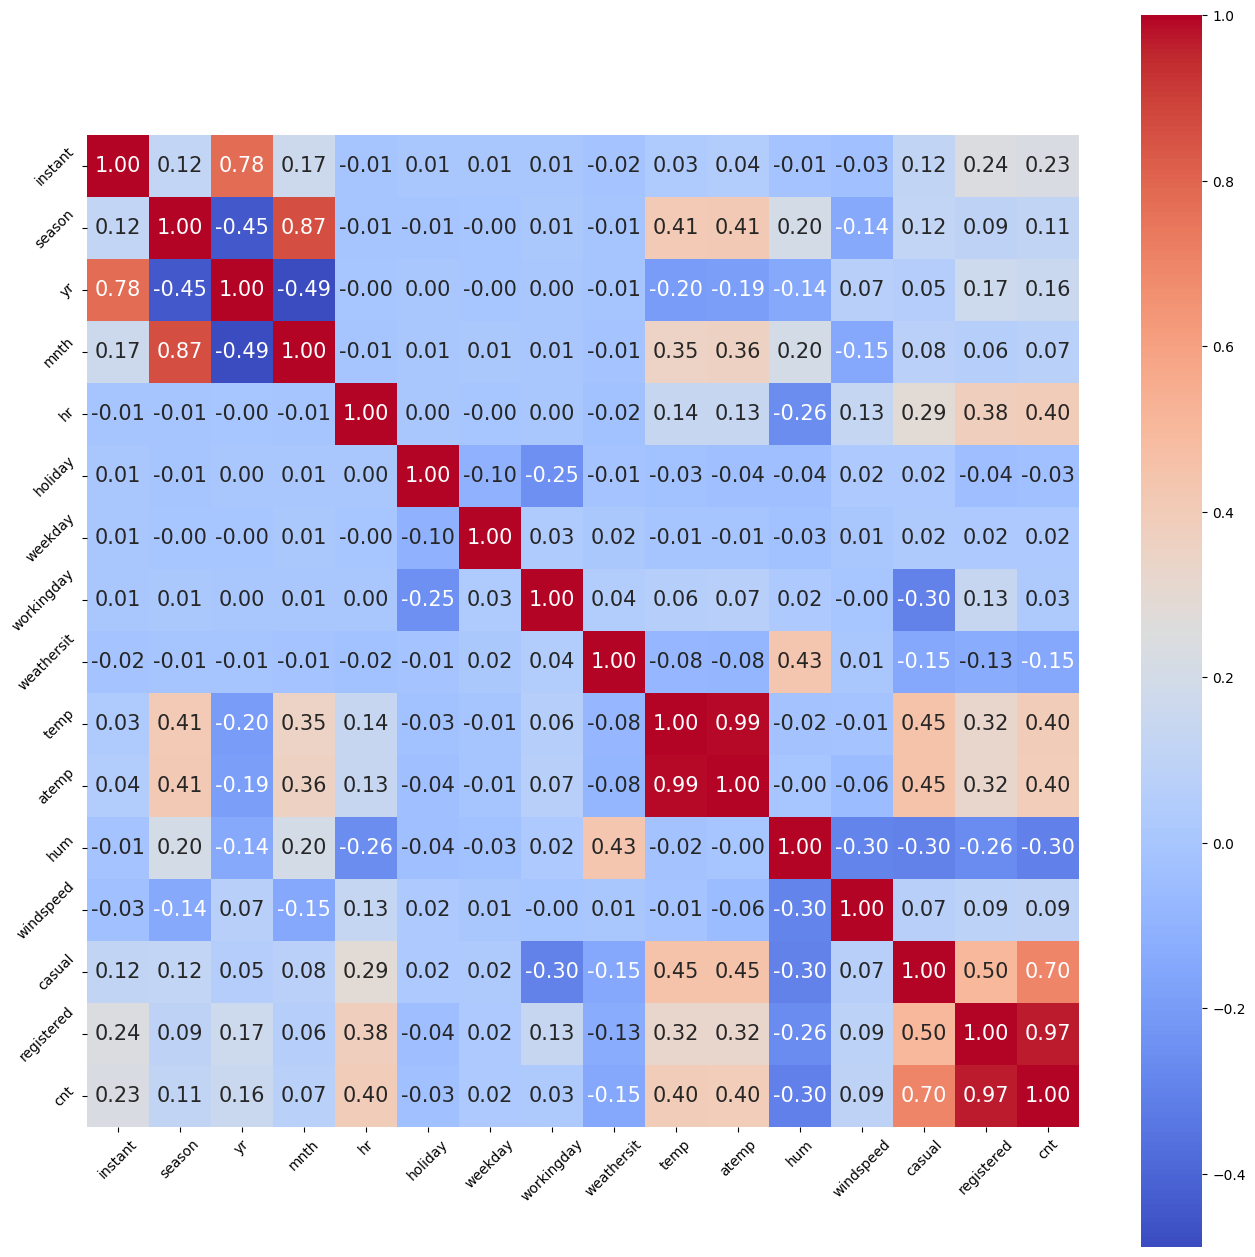

In [27]:

'''Visualizo la correlaciòn de las variables'''

plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
'''Exploración visual de correlación de variables'''
sns.pairplot(train)

Distribuciones

Variable objetivo:

Por lo analizado, se encuentra un sesgo positivo, así que existe outliers, el tipo de tratamiento será las Tres Sigmas de tal manera no influyan mucho en las predicciones

<AxesSubplot:ylabel='Frequency'>

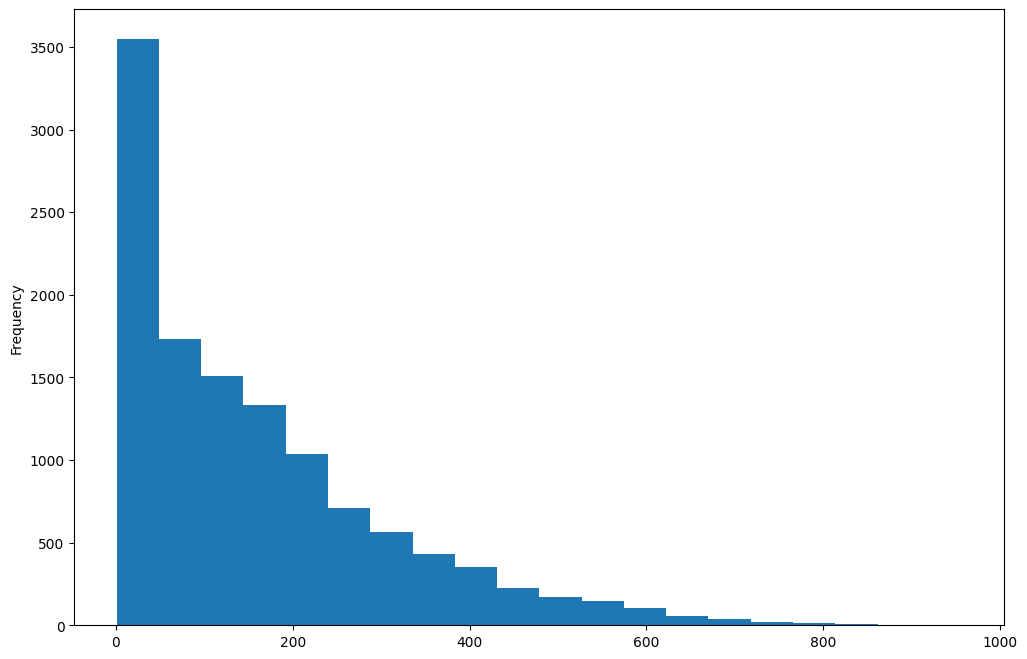

In [80]:
train['cnt'].plot.hist(bins=20, figsize=(12,8))

In [ ]:
train.plot(x='hr', y='cnt', figsize=(20,12), title = 'Horas de renta de bicicletas')
plt.ylabel('cnt')

Análisis de las Tres Sigmas

In [ ]:
trainoutOutliers = train[np.abs(train["cnt"]-train["cnt"].mean())<=(3*train["cnt"].std())]
print ("Forma de los outliers en un inicio: ",train.shape)
print ("Forma de los outliers después: ",trainoutOutliers.shape)

[Text(0.5, 0, 'hr'), Text(0.5, 1.0, 'El impacto de la hora en el alquiler')]

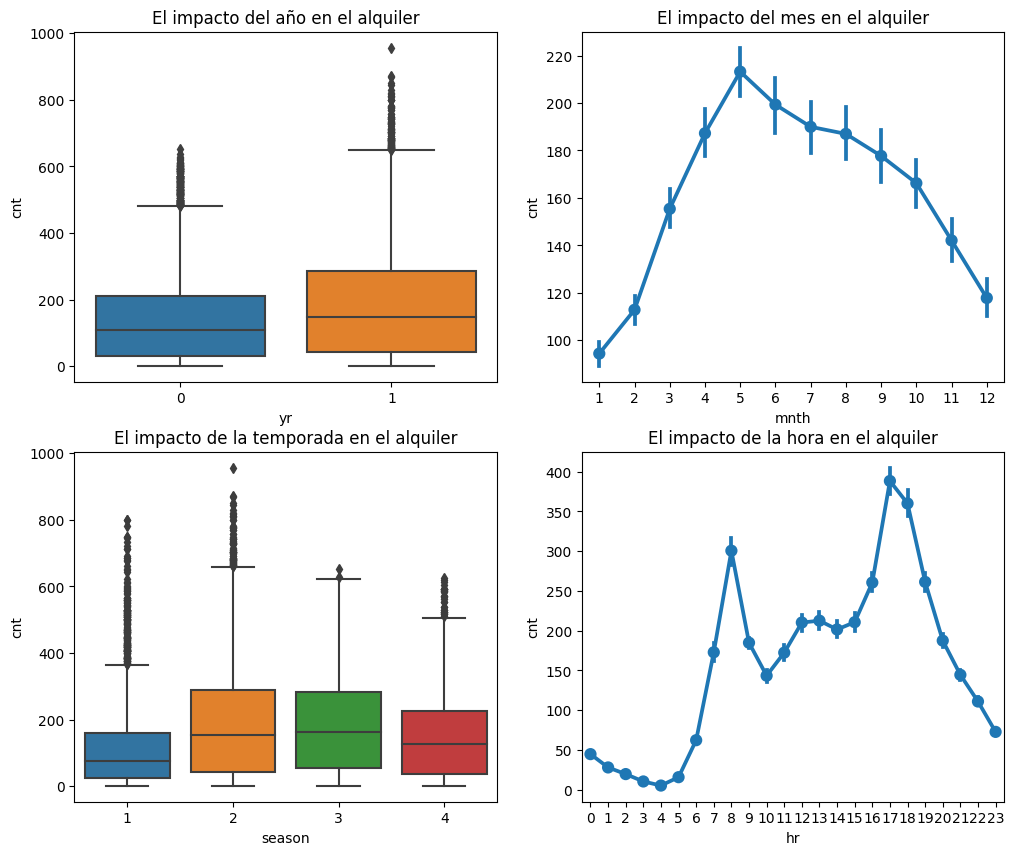

In [76]:
''' Impacto de variable en el volumen de alquiler '''
fig,axes=plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.boxplot(train['yr'],train['cnt'],ax=axes[0,0])

sns.pointplot(train['mnth'],train['cnt'],ax=axes[0,1])

sns.boxplot(train['season'],train['cnt'],ax=axes[1,0])

sns.pointplot(train['hr'],train['cnt'],ax=axes[1,1])
axes[0,0].set(xlabel='yr',title='El impacto del año en el alquiler')
axes[0,1].set(xlabel='mnth',title='El impacto del mes en el alquiler')
axes[1,0].set(xlabel='season',title='El impacto de la temporada en el alquiler')
axes[1,1].set(xlabel='hr',title='El impacto de la hora en el alquiler')

Cifra de "Impacto de los años en el volumen de alquiler": el volumen de alquiler en 2012 fue más alto que en 2011, lo que indica que con el tiempo, son más personas han aceptado gradualmente las bicicletas compartidas.
"Influencia mensual en el volumen de alquiler": el mes tiene un impacto significativo en el volumen de alquiler. La cantidad de usuarios aumentó gradualmente a partir de enero, alcanzó el pico en junio y luego cayó drásticamente en octubre. Obviamente, esto está relacionado con la temporada.
"Gráfico de la influencia de las temporadas en el volumen de alquiler": Hay más ciclistas en verano y otoño, y alcanzan su punto máximo en otoño (cuando hace buen tiempo). Sin embargo, debido a que las influencias de las estaciones y los meses se superponen básicamente y los meses son más detallados, las características de los meses se seleccionan cuando se establece el modelo y se eliminan las características estacionales.
"El gráfico de la influencia del tiempo en el volumen de alquiler": según el gráfico, hay dos períodos pico todos los días, que son alrededor de las 8 a. m. y alrededor de las 17 p. m., que se desplazan diariamente durante los días laborables. pico. Por tanto, podemos pensar en la influencia de las vacaciones y las semanas en el volumen de alquiler.

<AxesSubplot:xlabel='hr', ylabel='cnt'>

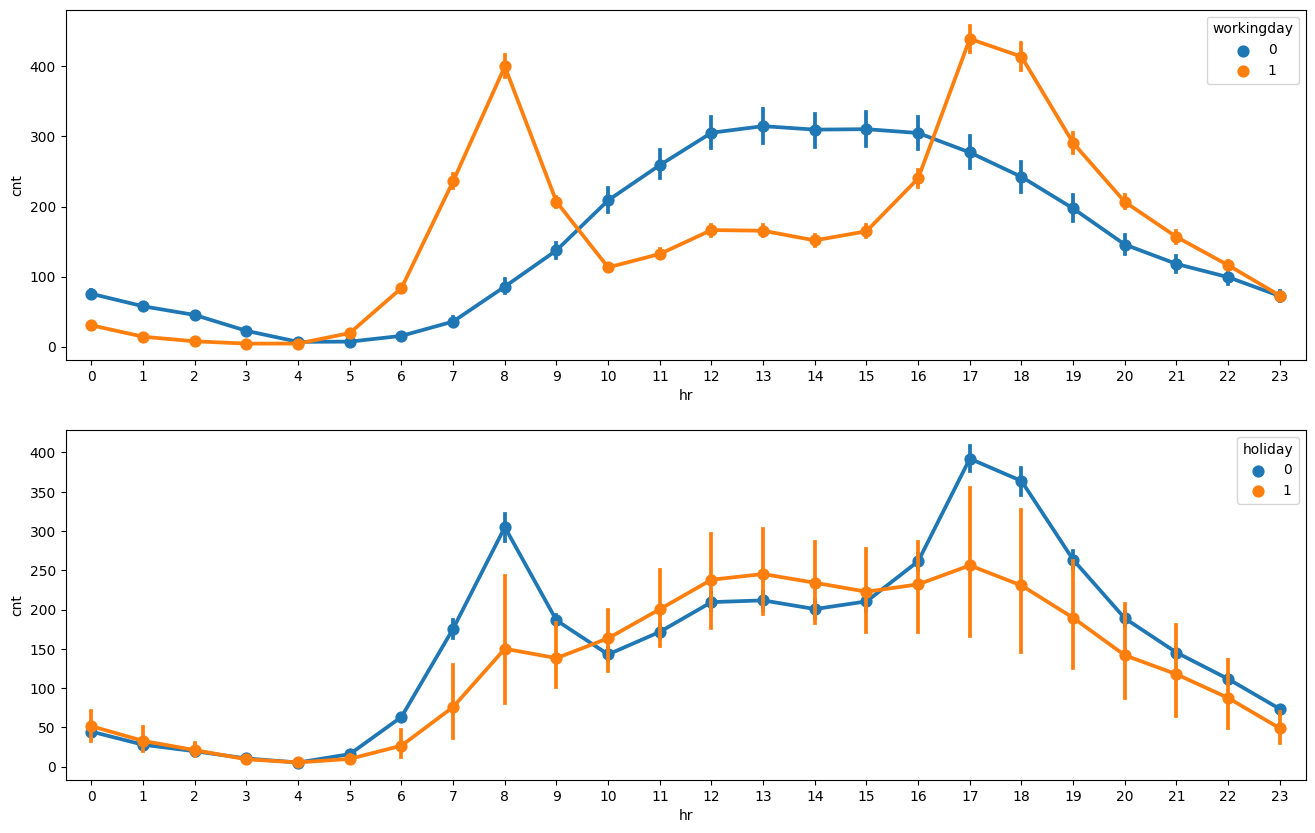

In [75]:
fig, axes = plt.subplots(2,1,figsize=(16, 10))
sns.pointplot(train['hr'],train['cnt'],hue=train['workingday'],ax=plt.subplot(2,1,1))
sns.pointplot(train['hr'],train['cnt'],hue=train['holiday'],ax=plt.subplot(2,1,2))

Se puede observar que el volumen de alquiler es alto durante las horas pico por la mañana y por la noche los días de semana, y el volumen de alquiler es bajo durante el resto del tiempo; el volumen de alquiler es alto al mediodía y por la tarde los días festivos.

Conclusiones de la exploración:
Dadas las características del problema, se debe implementar un modelo de regresión. Sin embargo es evidente que el dataset presenta cierta complejidad por lo que no es conveneniente utilizar modelos de regresión lineal, tampoco sirven modelos de regresión logística.

Se harà un modelo de predicción para satisfacer las demandas de los usuarios y operaciones eficientes para bicicletas de alquiler utilizando Random Forest.  

Eliminación de features

In [ ]:

train.drop(labels = ['casual',"cnt","dteday","registered","instant"],axis=1, inplace=True)
test.drop(labels = ["dteday","instant"],axis=1, inplace=True)

Variables predictoras

In [5]:
categoricalFeatureNames = ["season","holiday","workingday","weathersit","weekday","mnth","yr","hr"]
numericalFeatureNames = ["temp","hum","windspeed","atemp"]

Para facilitar el procesamiento general, el conjunto de prueba y el conjunto de entrenamiento ahora están fusionado

In [51]:
df_final = pd.concat([train,test])

In [6]:
rf = RandomForestRegressor(n_estimators=50,
                           random_state=5)
                           
'''Datos de entrenamiento'''
X_train=train[['windspeed','hum','workingday','weathersit','hr']]
#print(X_train)
y_train= train['temp']
grid_rf=(rf.fit(X_train, y_train))
print(grid_rf)

RandomForestRegressor(n_estimators=50, random_state=5)


Una vez que se construye el modelo Random Forest, podemos extraer directamente la importancia de las características con random forest, utilizando el atributo featureimportances del modelo RandomForestClassifier En la gráfica retorna los valores que considera más importante al tomar la temperatura lo cual nos dio 0.19, pero se reduce al tomar ahora la velocidad del aire.

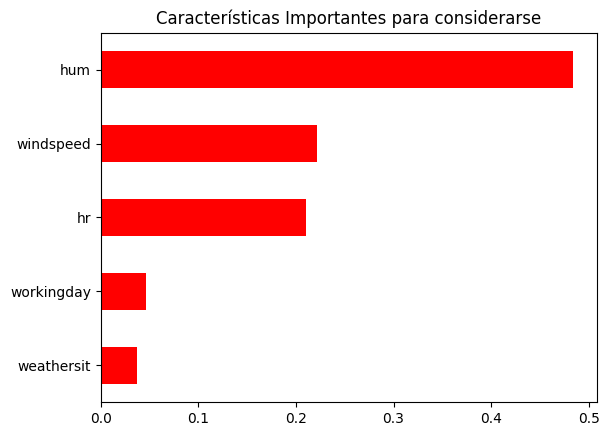

In [7]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='red')
plt.title('Características Importantes para considerarse')
plt.show()

In [8]:
X_train=train[['hum','workingday','weathersit','hr','temp']]
print(X_train)
X_test=test[['hum','workingday','weathersit','hr','temp']]

y_train= train['windspeed']
y_test= test['windspeed']

        hum  workingday  weathersit  hr  temp
0      0.81           0           1   0  0.24
1      0.80           0           1   1  0.22
2      0.80           0           1   2  0.22
3      0.75           0           1   3  0.24
4      0.75           0           1   4  0.24
...     ...         ...         ...  ..   ...
11994  0.56           0           1  23  0.60
11995  0.53           0           1   0  0.58
11996  0.52           0           1   1  0.56
11997  0.52           0           1   2  0.56
11998  0.56           0           1   3  0.54

[11999 rows x 5 columns]


In [18]:
from math import sqrt
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_pred))

# Print rmse_test
print('Prueba de RMSE rf: {:.2f}'.format(rmse_test))

Prueba de RMSE rf: 0.13


In [19]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor().fit(X_train, y_train)
 

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.12551016908065304


In [21]:
y_pred = rf.predict(X_test).reshape(-1,1)

In [22]:
y_pred

array([[0.1630033 ],
       [0.15437367],
       [0.120135  ],
       ...,
       [0.1161035 ],
       [0.11773763],
       [0.17294868]])

In [110]:
'''Creo un Dataframe para guardar la predicciòn'''
Sik1901 = pd.DataFrame()
Sik1901['pred'] = pd.DataFrame(y_pred)
Sik1901['pred'] = Sik1901['pred']

In [111]:
Sik1901

,pred
0,0.157320
1,0.172451
2,0.114759
3,0.163450
4,0.126272
...,...
5375,0.165816
5376,0.237400
5377,0.118194
5378,0.106397


In [112]:
Sik1901.to_csv('Sik1901.csv', index = False)